## About the dataset

This dataset is taken from Kaggle: [Sleep Data](https://www.kaggle.com/datasets/danagerous/sleep-data?select=sleepdata.csv). It tracks the sleep cycles of a particular user from [2014-2018](../data/raw/sleepdata.csv) and [2018-2022](../data/raw/sleepdata_2.csv).

Both datasets have Start, End, and Sleep Quality (target) columns. Both datasets also have a few other faetures, but the data from 2018-2022 (sleepdata_2.csv) contains additional columns that the 2014-2018 (sleepdata.csv) data does not have. 

## Imports

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Initial cleaning to stack datasets

In [264]:
df1 = pd.read_csv("../data/raw/sleepdata.csv", sep=";", parse_dates=["Start", "End"])
print(df1.shape)
df1.head()

(887, 8)


,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [265]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Start             887 non-null    datetime64[ns]
 1   End               887 non-null    datetime64[ns]
 2   Sleep quality     887 non-null    object        
 3   Time in bed       887 non-null    object        
 4   Wake up           246 non-null    object        
 5   Sleep Notes       652 non-null    object        
 6   Heart rate        162 non-null    float64       
 7   Activity (steps)  887 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 55.6+ KB


In [266]:
df2 = pd.read_csv("../data/raw/sleepdata_2.csv", sep=";", parse_dates=["Start", "End"])
print(df2.shape)
df2.head()

(921, 21)


,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,92%,NaN,0,6578,Normal,NaN,NaN,...,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,94%,NaN,0,4913,Normal,NaN,NaN,...,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


In [267]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        921 non-null    datetime64[ns]
 1   End                          921 non-null    datetime64[ns]
 2   Sleep Quality                921 non-null    object        
 3   Regularity                   921 non-null    object        
 4   Mood                         0 non-null      float64       
 5   Heart rate (bpm)             921 non-null    int64         
 6   Steps                        921 non-null    int64         
 7   Alarm mode                   921 non-null    object        
 8   Air Pressure (Pa)            492 non-null    float64       
 9   City                         487 non-null    object        
 10  Movements per hour           921 non-null    float64       
 11  Time in bed (seconds)        921 non-null    

In [268]:
pd.to_timedelta(df1["Time in bed"] + ":00").dt.total_seconds() / 3600

0      8.533333
1      0.266667
2      8.500000
3      7.533333
4      6.733333
         ...   
882    9.133333
883    7.183333
884    8.933333
885    9.216667
886    8.916667
Name: Time in bed, Length: 887, dtype: float64

In [269]:
df1["Time in bed (hr)"] = pd.to_timedelta(df1["Time in bed"] + ":00").dt.total_seconds() / 3600

In [270]:
df1 = df1.drop(columns=["Wake up", "Sleep Notes", "Time in bed"])
df2 = df2.drop(columns=["Mood", "Notes"])

In [271]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Start             887 non-null    datetime64[ns]
 1   End               887 non-null    datetime64[ns]
 2   Sleep quality     887 non-null    object        
 3   Heart rate        162 non-null    float64       
 4   Activity (steps)  887 non-null    int64         
 5   Time in bed (hr)  887 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 41.7+ KB


In [272]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        921 non-null    datetime64[ns]
 1   End                          921 non-null    datetime64[ns]
 2   Sleep Quality                921 non-null    object        
 3   Regularity                   921 non-null    object        
 4   Heart rate (bpm)             921 non-null    int64         
 5   Steps                        921 non-null    int64         
 6   Alarm mode                   921 non-null    object        
 7   Air Pressure (Pa)            492 non-null    float64       
 8   City                         487 non-null    object        
 9   Movements per hour           921 non-null    float64       
 10  Time in bed (seconds)        921 non-null    float64       
 11  Time asleep (seconds)        921 non-null    

In [273]:
df2["Time in bed (hr)"] = df2["Time in bed (seconds)"] / 3600
rows_to_move = ['Start', 'End', 'Sleep Quality', 'Heart rate (bpm)', 'Steps', 'Time in bed (hr)']
df2 = df2.drop(columns=["Time in bed (seconds)"])
row_order = rows_to_move + [c for c in df2.columns if c not in rows_to_move]
df2 = df2[row_order]


In [274]:
df1 = df1.rename(columns={"Heart rate": "Heart rate (bpm)", "Activity (steps)": "Steps"})
df2 = df2.rename(columns={"Sleep Quality": "Sleep quality"})

In [275]:
df1.head()

,Start,End,Sleep quality,Heart rate (bpm),Steps,Time in bed (hr)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,59.0,0,8.533333
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,72.0,0,0.266667
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,57.0,0,8.500000
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,NaN,0,7.533333
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,68.0,0,6.733333


In [276]:
df2.head()

,Start,End,Sleep quality,Heart rate (bpm),Steps,Time in bed (hr),Regularity,Alarm mode,Air Pressure (Pa),City,Movements per hour,Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0,8350,6.747000,0%,Normal,NaN,NaN,35.0,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0,4746,8.002833,0%,Normal,NaN,NaN,78.6,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,0,4007,8.461528,96%,Normal,NaN,NaN,60.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,0,6578,7.035444,92%,Normal,NaN,NaN,45.2,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,0,4913,7.138444,94%,Normal,NaN,NaN,44.6,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather


In [277]:
df = pd.concat([df1, df2], ignore_index=True, sort=False)
df = df.reset_index(drop=True)
print(df.shape)
df.iloc[886:890]

(1808, 19)


,Start,End,Sleep quality,Heart rate (bpm),Steps,Time in bed (hr),Regularity,Alarm mode,Air Pressure (Pa),City,Movements per hour,Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type
886,2018-02-16 22:52:29,2018-02-17 07:48:04,91%,NaN,2291,8.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0.0,8350,6.747000,0%,Normal,NaN,NaN,35.0,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather
888,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0.0,4746,8.002833,0%,Normal,NaN,NaN,78.6,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather
889,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,0.0,4007,8.461528,96%,Normal,NaN,NaN,60.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather


## Imputing missing values using ml

### Method 1: manual

In [278]:
cols_over_half_nan = df.columns[df.isna().mean() >= 0.5].tolist()
cols_over_half_nan

['Air Pressure (Pa)', 'City', 'Window start', 'Window stop']

In [279]:
df = df.drop(columns=cols_over_half_nan)

In [280]:
df.shape

(1808, 15)

#### aside: outlier detection?

In [281]:
(df.iloc[1000:1005]["Time asleep (seconds)"] + df.iloc[1000:1005]["Time before sleep (seconds)"])/3600

1000    6.088722
1001    6.346472
1002    6.144750
1003    6.626500
1004    6.858389
dtype: float64

In [282]:
df.iloc[1000:1005]["Time in bed (hr)"]

1000    6.866972
1001    7.130861
1002    6.727806
1003    7.335611
1004    7.481861
Name: Time in bed (hr), dtype: float64

plotting histograms for outliers soon, but spotted the two (seconds) cols...hmm

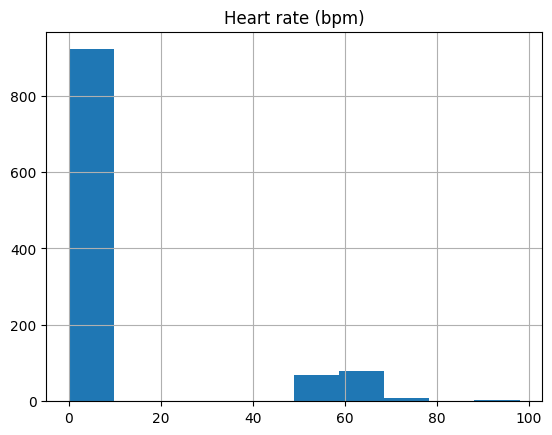

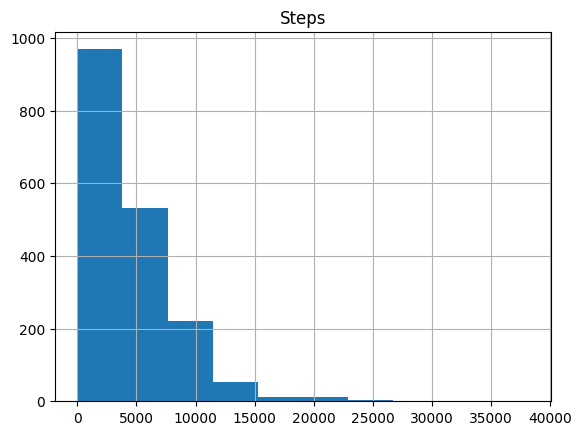

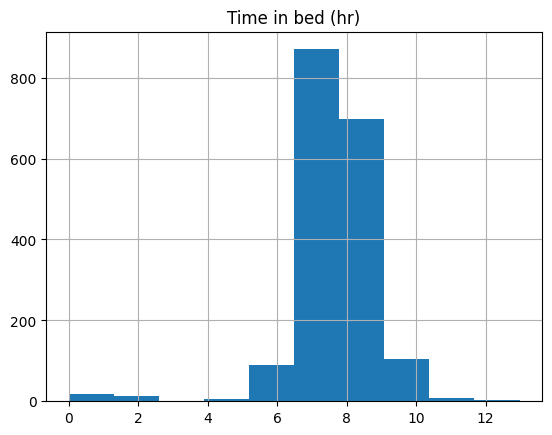

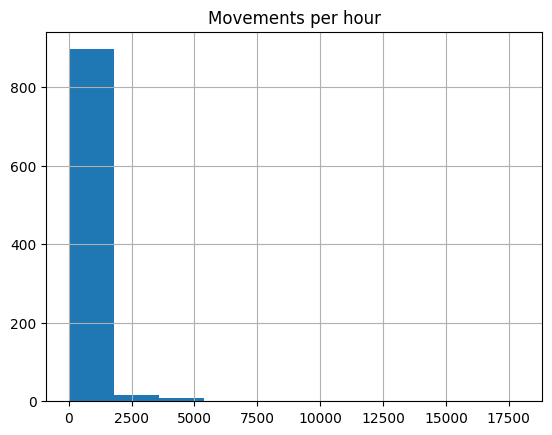

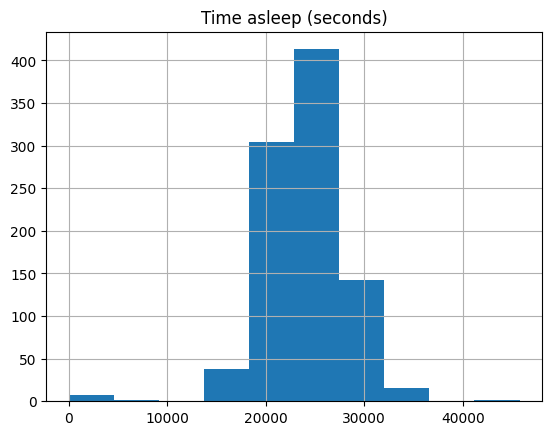

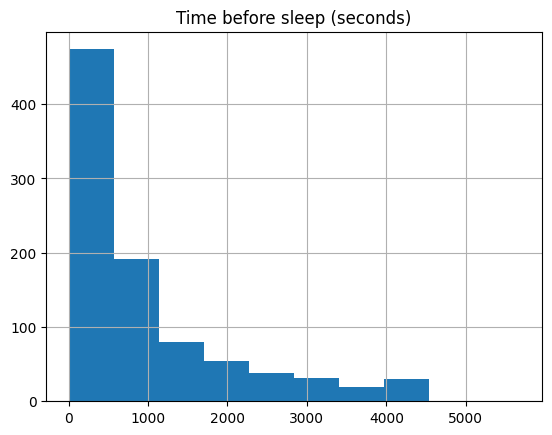

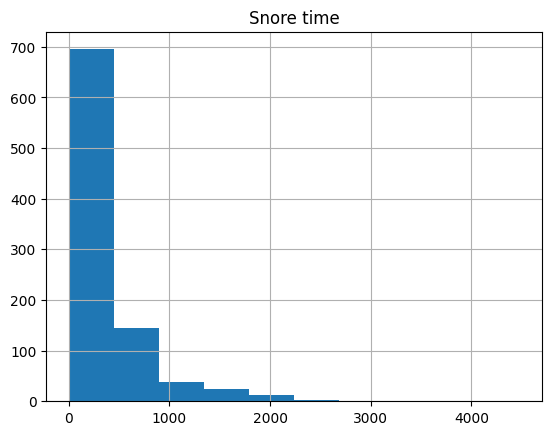

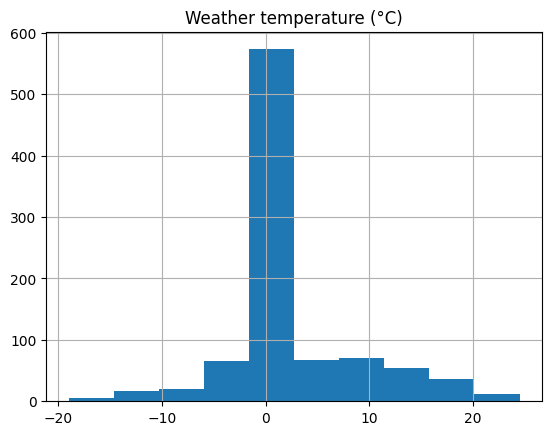

In [283]:
for col in df.select_dtypes("number").columns:  
    plt.figure()
    plt.title(col)
    df[col].hist()

biggest things are: remove naps, and 0 bpm heartrate?? 0 bpm heartrate first

In [284]:
df.isna().sum().sum()

np.int64(8708)

In [285]:
df2.describe()

,Start,End,Heart rate (bpm),Steps,Time in bed (hr),Air Pressure (Pa),Movements per hour,Time asleep (seconds),Time before sleep (seconds),Snore time,Weather temperature (°C)
count,921,921,921.0,921.000000,921.000000,492.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,2020-10-14 09:47:50.009772032,2020-10-14 17:26:11.588490752,0.0,5311.599349,7.640416,68.660163,174.277416,23912.683170,1001.556135,312.944300,2.142562
min,2019-05-12 23:26:13,2019-05-13 06:11:03,0.0,0.000000,0.514667,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000
25%,2020-02-14 21:08:43,2020-02-15 07:23:42,0.0,2299.000000,7.083500,0.000000,37.000000,21627.500000,449.900000,0.000000,0.000000
50%,2020-10-13 21:36:30,2020-10-14 05:09:08,0.0,4245.000000,7.617472,93.700000,49.600000,23919.000000,563.700000,148.000000,0.000000
75%,2021-06-07 21:57:36,2021-06-08 04:42:57,0.0,7452.000000,8.202806,94.400000,65.200000,26257.000000,1287.000000,440.000000,3.100000
max,2022-03-29 22:44:09,2022-03-30 05:11:15,0.0,38165.000000,12.973167,96.500000,17926.700000,45769.400000,5677.700000,4477.300000,24.500000
std,NaN,NaN,0.0,4396.822762,1.087971,41.845368,822.776299,4066.189356,1046.287777,455.472848,6.324558


In [286]:
# counting all non nan and non zero values
df["Heart rate (bpm)"].dropna().astype(bool).sum()

np.int64(162)

yeah, lets drop bpm. Nan values not encoded as nan are annoying!

In [287]:
df = df.drop(columns=["Heart rate (bpm)"])

now looking at filtering out naps

<Axes: >

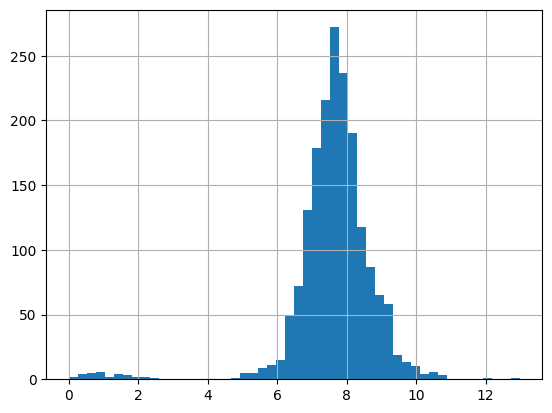

In [288]:
df["Time in bed (hr)"].hist(bins=50)

the gap in between 2 hr 30 min and 4 hr 30 min seems to be the difference between nap and sleep. lets filter out all naps this way

In [289]:
df = df[df["Time in bed (hr)"] >= 3.5]
df

,Start,End,Sleep quality,Steps,Time in bed (hr),Regularity,Alarm mode,Movements per hour,Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C),Weather type
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,0,8.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,0,8.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,0,7.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,0,6.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-01-03 00:34:57,2015-01-03 07:47:23,83%,0,7.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2022-03-23 22:30:25,2022-03-24 06:03:07,72%,2521,7.545000,86%,Normal,45.1,25079.6,543.2,True,1080.0,4.6,Fog
1803,2022-03-24 21:33:46,2022-03-25 04:21:40,71%,3903,6.798361,77%,Normal,39.7,20803.0,489.5,True,695.7,4.0,Cloudy
1805,2022-03-26 21:14:23,2022-03-27 06:11:01,49%,13388,8.943917,-1%,Normal,82.7,24577.9,3649.1,True,506.4,-1.1,Cloudy
1806,2022-03-28 22:53:23,2022-03-29 04:50:36,77%,456,5.953778,22%,Normal,17.3,15860.8,428.7,True,60.0,6.1,Sunny


In [290]:
df.shape

(1777, 14)

there were about 30 naps in dataset

#### outlier aside finished

### Quick recap on all the dropping we've done so far:

Originally, we had 22 features between the two dataframes:
- In both dataframes (7)
    - Start
    - End
    - Sleep quality
    - Time in bed 
    - Sleep Notes/notes
    - Heart rate
    - Activity/steps

- In df1 only (2014-2018) (1)
    - Wake up (emoticon)

- In df2 only (2019-2022) (14)
    - Regularity
    - Mood
    - Alarm mode
    - Air Pressure
    - City
    - Movements per hour
    - Time asleep (seconds)
    - Time before sleep (seconds)
    - Window start
    - Window stop
    - Did snore
    - Snore time
    - Weather temperature (°C) 
    - Weather type<br><br><br>

In this EDA, I dropped:
- In both dataframes (2)
    - Sleep Notes/notes
    - Heart rate

- In df1 only (2014-2018) (1)
    - Wake up (emoticon)

- In df2 only (2019-2022) (5)
    - Mood
    - Air Pressure
    - City
    - Window start
    - Window stop<br><br><br>

Thus, the remaining features are:
- In both dataframes (5)
    - Start
    - End
    - Sleep quality
    - Time in bed 
    - Activity/steps

- In df1 only (2014-2018) (0)

- In df2 only (2019-2022) (9)
    - Regularity
    - Alarm mode
    - Movements per hour
    - Time asleep (seconds)
    - Time before sleep (seconds)
    - Did snore
    - Snore time
    - Weather temperature (°C) 
    - Weather type<br><br><br>

I'll try predicting with the rest of the features; notably,
- Regularity                     
- Alarm mode                     
- Movements per hour             
- Time asleep (seconds)          
- Time before sleep (seconds)    
- Did snore                      
- Snore time                     
- Weather temperature (°C)       
- Weather type      

only appear in the 2018-2022 dataset, so I'll try imputing by [using a model to predict missing values](https://www.youtube.com/watch?v=KWrZ59nLLSg)

### Actually imputing with a model now

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 0 to 1807
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        1777 non-null   datetime64[ns]
 1   End                          1777 non-null   datetime64[ns]
 2   Sleep quality                1777 non-null   object        
 3   Steps                        1777 non-null   int64         
 4   Time in bed (hr)             1777 non-null   float64       
 5   Regularity                   913 non-null    object        
 6   Alarm mode                   913 non-null    object        
 7   Movements per hour           913 non-null    float64       
 8   Time asleep (seconds)        913 non-null    float64       
 9   Time before sleep (seconds)  913 non-null    float64       
 10  Did snore                    913 non-null    object        
 11  Snore time                   913 non-null    flo

first, sleep quality and regularity are numeric but currently stored as strings, so convert to numeric

In [292]:
pct_cols = ["Sleep quality", "Regularity"]
df[pct_cols] = df[pct_cols].apply(lambda x: x.str.replace("%", "").astype(float))

In [293]:
df[pct_cols] = df[pct_cols] / 100
df.iloc[1000:1005]

,Start,End,Sleep quality,Steps,Time in bed (hr),Regularity,Alarm mode,Movements per hour,Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C),Weather type
1023,2019-10-23 20:59:40,2019-10-24 06:04:21,0.92,3816,9.078222,0.94,Normal,49.8,28977.7,217.9,True,0.0,0.0,No weather
1024,2019-10-24 22:19:11,2019-10-25 07:07:17,0.92,2368,8.801639,0.89,Normal,47.6,29151.1,211.2,True,334.0,-0.5,Cloudy
1025,2019-10-25 21:47:32,2019-10-26 07:09:21,0.78,7632,9.363722,0.88,Normal,66.0,29776.6,3258.6,True,0.0,0.0,No weather
1026,2019-10-27 22:34:04,2019-10-28 06:01:38,0.75,7076,7.459222,0.90,Normal,51.7,23899.4,179.0,True,65.0,0.0,No weather
1027,2019-10-28 22:29:22,2019-10-29 05:59:51,0.75,3601,7.508167,0.92,Normal,52.2,22074.0,1531.7,True,107.0,0.0,No weather


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 0 to 1807
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        1777 non-null   datetime64[ns]
 1   End                          1777 non-null   datetime64[ns]
 2   Sleep quality                1777 non-null   float64       
 3   Steps                        1777 non-null   int64         
 4   Time in bed (hr)             1777 non-null   float64       
 5   Regularity                   913 non-null    float64       
 6   Alarm mode                   913 non-null    object        
 7   Movements per hour           913 non-null    float64       
 8   Time asleep (seconds)        913 non-null    float64       
 9   Time before sleep (seconds)  913 non-null    float64       
 10  Did snore                    913 non-null    object        
 11  Snore time                   913 non-null    flo

In [295]:
cols_with_nans = [x for x in df if df[x].isna().sum() > 0]
cols_with_nans

['Regularity',
 'Alarm mode',
 'Movements per hour',
 'Time asleep (seconds)',
 'Time before sleep (seconds)',
 'Did snore',
 'Snore time',
 'Weather temperature (°C)',
 'Weather type']

In [296]:
df[cols_with_nans].dtypes

Regularity                     float64
Alarm mode                      object
Movements per hour             float64
Time asleep (seconds)          float64
Time before sleep (seconds)    float64
Did snore                       object
Snore time                     float64
Weather temperature (°C)       float64
Weather type                    object
dtype: object

In [297]:
df[cols_with_nans].isna().sum()

Regularity                     864
Alarm mode                     864
Movements per hour             864
Time asleep (seconds)          864
Time before sleep (seconds)    864
Did snore                      864
Snore time                     864
Weather temperature (°C)       864
Weather type                   864
dtype: int64

In [298]:
numeric_cols = [col for col in df[cols_with_nans].select_dtypes("number")]
cat_cols = [col for col in df[cols_with_nans].select_dtypes("object")]
print(numeric_cols)
print(cat_cols)

['Regularity', 'Movements per hour', 'Time asleep (seconds)', 'Time before sleep (seconds)', 'Snore time', 'Weather temperature (°C)']
['Alarm mode', 'Did snore', 'Weather type']


In [299]:
for col in numeric_cols:
    na_percent = df[col].isna().sum() / len(df[col])
    print(f"{col}:{na_percent}")

Regularity:0.48621271806415306
Movements per hour:0.48621271806415306
Time asleep (seconds):0.48621271806415306
Time before sleep (seconds):0.48621271806415306
Snore time:0.48621271806415306
Weather temperature (°C):0.48621271806415306
